In [7]:
import sys
print(sys.executable)

!pip install pandas

/opt/conda/envs/anaconda-2024.02-py310/bin/python
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [8]:
import pandas as pd
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


Columns in dataset: Index(['start_time', 'stop_time', 'speaker', 'value'], dtype='object')
                                                 value  sentiment
0              hi i'm ellie thanks for coming in today   0.200000
1    i was created to talk to people in a safe and ...   0.450000
2    think of me as a friend i don't judge i can't ...   0.000000
3    i'm here to learn about people and would love ...   0.500000
4    i'll ask a few questions to get us started and...   0.066667
..                                                 ...        ...
169                                               okay   0.500000
170       okay i think i've asked everything i need to   0.500000
171                                          thank you   0.000000
172                                            goodbye   0.000000
173                                            bye bye   0.000000

[174 rows x 2 columns]


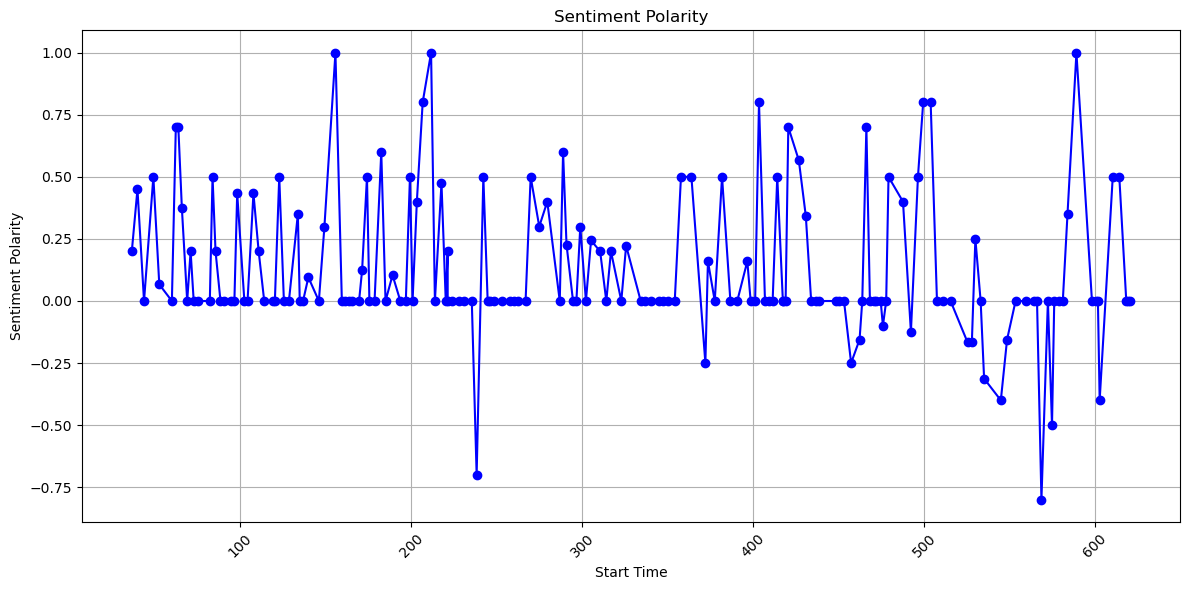

In [11]:

from textblob import TextBlob
import matplotlib.pyplot as plt

dataset = pd.read_csv('data/USC/300_TRANSCRIPT.csv', delimiter='\t')

print("Columns in dataset:", dataset.columns)
#gets sentiment analysis and creates new column sentiment
if 'value' in dataset.columns and 'start_time' in dataset.columns:
    # Calculate sentiment
    def get_sentiment(value):
        analysis = TextBlob(value)
        return analysis.sentiment.polarity

    dataset['sentiment'] = dataset['value'].apply(get_sentiment)

    
    print(dataset[['value', 'sentiment']])

    # 
    plt.figure(figsize=(12, 6))
    plt.plot(dataset['start_time'], dataset['sentiment'], marker='o', linestyle='-', color='b')
    plt.title('Sentiment Polarity')
    plt.xlabel('Start Time')
    plt.ylabel('Sentiment Polarity')
    plt.xticks(rotation=45) 
    plt.grid()
    plt.tight_layout()  
    plt.show()
else:
    print("DNE.")